# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

(150, 2) (150,)


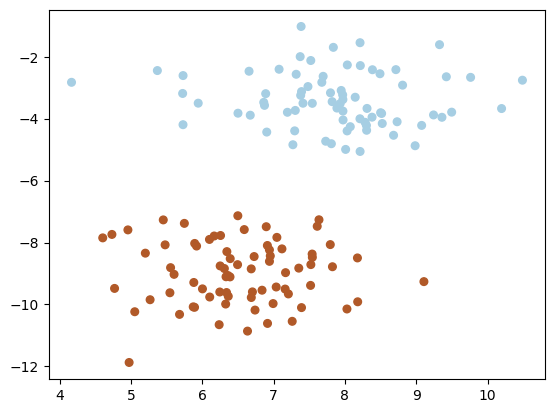

In [49]:
# we create 40 separable points
X, y = make_blobs(n_samples=150, centers=2, random_state=6)
print(X.shape, y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [50]:
clf = svm.SVC(kernel='linear', random_state=2)
clf.fit(X, y)

SVC(kernel='linear', random_state=2)

In [51]:
# Obtener los valores mínimos y máximos de las características
offset = .5
h_min, h_max = X[:, 0].min()-offset, X[:, 0].max()+offset
v_min, v_max = X[:, 1].min()-offset, X[:, 1].max()+offset

# Crear el grid de las fronteras de decisión
h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 100), np.linspace(v_min, v_max, 100))

# Predecir los valores del grid
predictions = clf.decision_function(np.c_[h_grid.ravel(), v_grid.ravel()])
print(predictions.shape)

# Encajar las predicciones al tamaño del grid
predictions = predictions.reshape(h_grid.shape)
print(predictions.shape)

(10000,)
(100, 100)


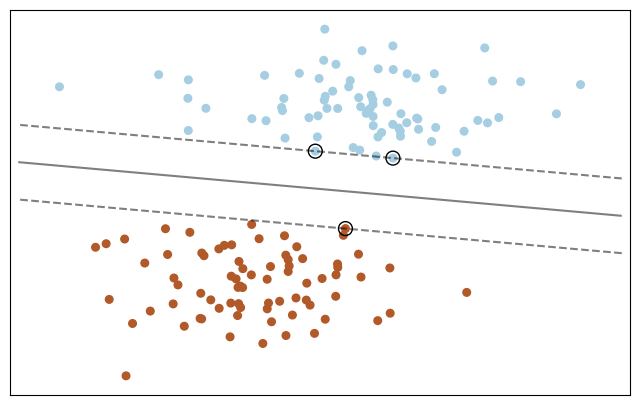

In [53]:
# Crear una figura y un eje
_, ax = plt.subplots(figsize=(8, 5))

# Graficar los puntos
ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Graficar el límite de decisión y los márgenes
ax.contour(h_grid, v_grid, predictions, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Marcar los vectores de soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')

# Establecer los límites del gráfico
ax.set_xlim(h_grid.min() - 0.1, h_grid.max() + 0.1)
ax.set_ylim(v_grid.min() - 0.1, v_grid.max() + 0.1)

# Ocultar las etiquetas de los ejes
ax.set_xticks(())
ax.set_yticks(())

plt.show()


## In real data

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import load_iris

In [46]:
# Cargar el conjunto de datos Iris
iris = load_iris()

# Seleccionar dos características (por ejemplo, sepal length y sepal width)
X = iris.data[:, :2]
y = iris.target


In [32]:
# Create an instance of SVM and fit the data.
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(kernel='linear')

In [33]:
# Plot decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

def plot_svm_decision_boundary(X, y, clf):

    offset = 0.1
    # Get the minimum and maximum values of features
    h_min, h_max = X[:, 0].min()+0.1, X[:, 0].max()+0.1
    v_min, v_max = X[:, 1].min()+0.1, X[:, 1].max()+0.1

    # Create a grid for decision boundaries
    h_grid, v_grid = np.meshgrid(np.linspace(h_min, h_max, 30), np.linspace(v_min, v_max, 30))

    # Predict values on the grid
    predictions = clf.decision_function(np.c_[h_grid.ravel(), v_grid.ravel()])
    predictions = predictions.reshape(h_grid.shape)

    # Create a figure and axis
    _, ax = plt.subplots(figsize=(8, 5))

    # Scatter plot of data points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Plot decision boundary and margins
    ax.contour(h_grid, v_grid, predictions, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Marcar los vectores de soporte
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

    # Set plot limits
    ax.set_xlim(h_min, h_max)
    ax.set_ylim(v_min, v_max)

    # Hide axis labels
    ax.set_xticks(())
    ax.set_yticks(())

    plt.title(f'Decision Boundary (SVM with lineal kernel)')
    plt.show()


plot_svm_decision_boundary(X, Y, clf)


ValueError: cannot reshape array of size 2700 into shape (30,30)